<a href="https://colab.research.google.com/github/MuhammadZackyAlanFernando/ClassificationHeartDisease/blob/main/classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease Using Machine Learning

Penyakit jantung merupakan salah satu penyebab utama kematian di dunia dan sering kali sulit dideteksi sejak dini. Oleh karena itu, pemanfaatan data klinis dan teknologi machine learning menjadi penting untuk membantu proses identifikasi risiko penyakit jantung.

Project ini bertujuan untuk membangun model machine learning yang dapat mengklasifikasikan kondisi pasien ke dalam kategori memiliki penyakit jantung atau tidak memiliki penyakit jantung berdasarkan data medis seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, dan karakteristik nyeri dada. Model yang dikembangkan diharapkan dapat memberikan prediksi yang akurat serta menjadi dasar pengembangan sistem pendukung keputusan di bidang kesehatan.



Notebook ini menggunakan berbagai library machine learning berbasis Python untuk membangun model machine learning yang mampu memprediksi apakah seseorang menderita penyakit jantung atau tidak berdasarkan atribut medis mereka

Terapat beberapa tahapan utama yaitu:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition
Dengan tersedianya data klinis pasien, diperlukan sebuah pendekatan berbasis machine learning yang mampu menganalisis pola dari data tersebut untuk memprediksi keberadaan penyakit jantung. Oleh karena itu, permasalahan utama dalam project ini adalah bagaimana membangun model klasifikasi yang dapat memprediksi penyakit jantung secara akurat berdasarkan fitur-fitur medis pasien.

Project ini memformulasikan permasalahan sebagai binary classification, dengan target prediksi berupa:

1: Pasien memiliki penyakit jantung

0: Pasien tidak memiliki penyakit jantung

## Data
Data asli berasal dari data Cleavland dari UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

Ada juga versi dari data tersebut yang tersedia di Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## Evaluation
 Jika model bisa mencapai akurasi 93% dalam memprediksi apakah seorang pasien memiliki penyakit jantung atau tidak, maka project ini akan dilanjutkan untuk dikembangkan dan diamnfaatkan dalam bidang kesehatan

## Features

**Data dictionary**

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |



## Preparing the tools

pandas untuk analisis data.

NumPy untuk operasi nukmerik.

Matplotlib/seaborn untuk plotting atau visualisasi data.

Scikit-Learn untuk modelling dan evaluasi machine learning.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


 ## Load data
 Pada tahap ini, dataset dimuat ke dalam lingkungan kerja untuk dilakukan eksplorasi awal. Eksplorasi ini bertujuan untuk memahami struktur data, jumlah fitur, serta kondisi awal dataset sebelum dilakukan proses analisis dan preprocessing lebih lanjut.

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#apakah ada missing value?
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Berdasarkan eksplorasi awal, dataset memiliki sejumlah fitur numerik  yang relevan untuk proses klasifikasi penyakit jantung. Tidak terdapat nilai kosong pada dataset, sehingga tidak diperlukan penanganan missing values pada tahap preprocessing selanjutnya.

## Data Exploration (EDA)

Exploratory Data Analysis (EDA) dilakukan untuk memahami karakteristik data, melihat pola, hubungan antar fitur, serta distribusi target variabel. Hasil dari EDA ini akan menjadi dasar dalam proses preprocessing dan pemilihan model machine learning.

In [7]:
# Jumlah masing-masing target
df["target"].value_counts()

,count
target,
1,165
0,138


<Axes: xlabel='target'>

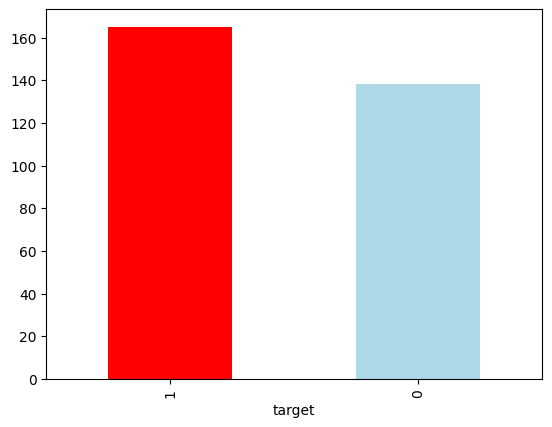

In [8]:
df["target"].value_counts().plot(kind="bar", color=["red", "lightblue"])

### Frekuensi Penyakit Jantung berdasarkan Jenis Kelamin

In [9]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


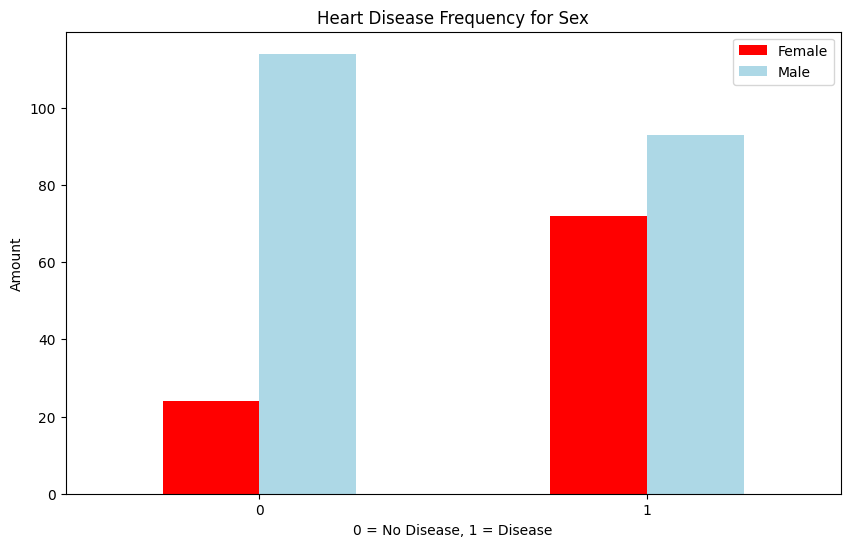

In [11]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                     figsize=(10, 6),
                                     color=["red", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);


### Distribusi penyakit jantung berdasarkan usia dan detak jantung maksimal

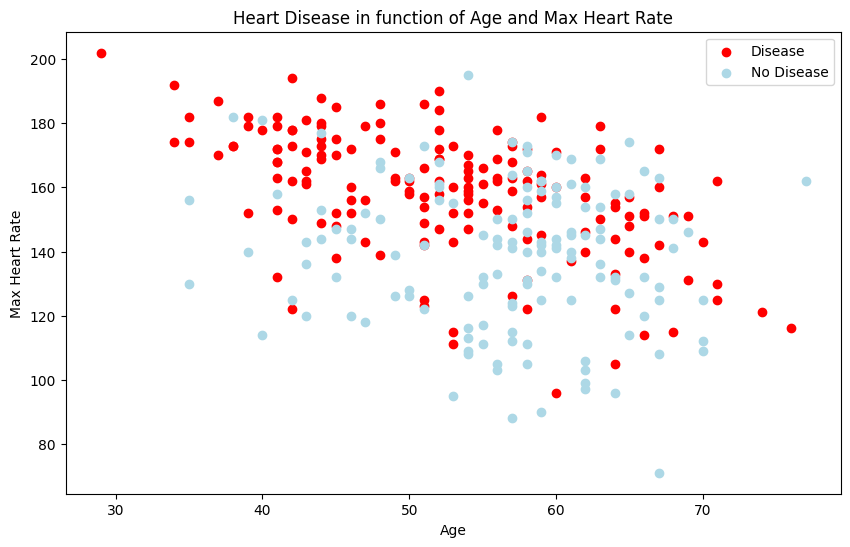

In [12]:

plt.figure(figsize=(10, 6))

#Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

#scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

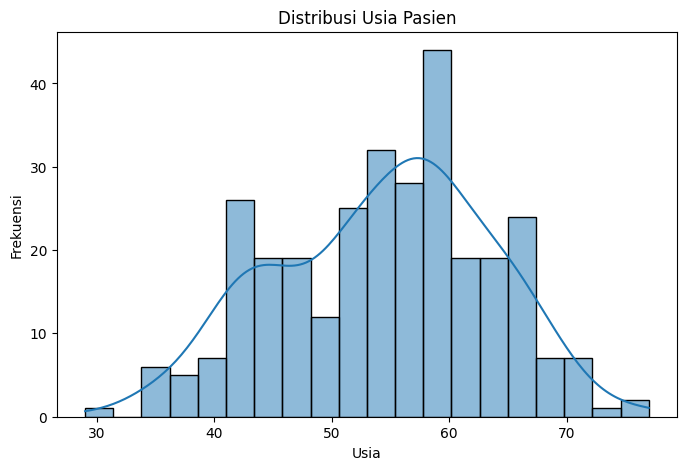

In [13]:
# distribusi usia
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar pasien berada pada rentang usia tertentu, yang menunjukkan bahwa faktor usia memiliki peran penting dalam risiko penyakit jantung.

## Heart Disease Frequency per Chest Pain Type

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


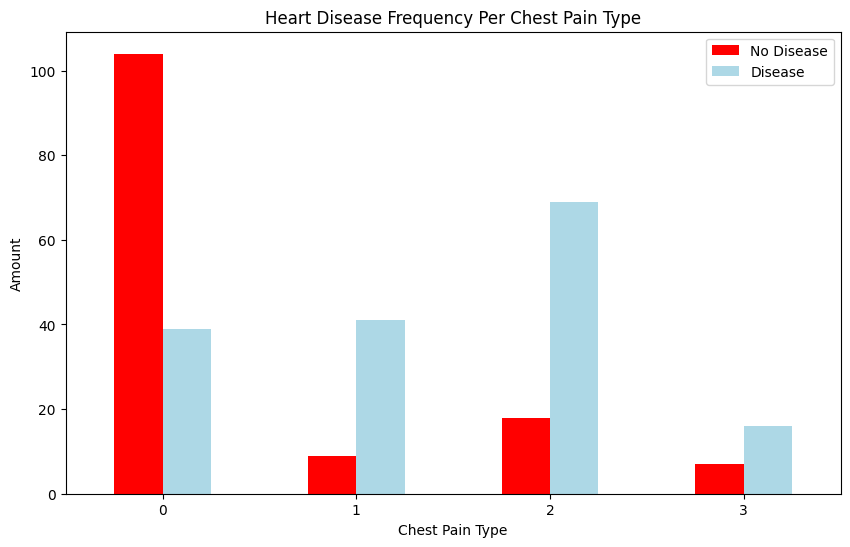

In [15]:
#make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["red", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

jadi dapat dilihat bahwa penderita penyakit jantung banyak pada jenis nyeri dada tipe ke 2

In [49]:
### Korelation

In [48]:

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


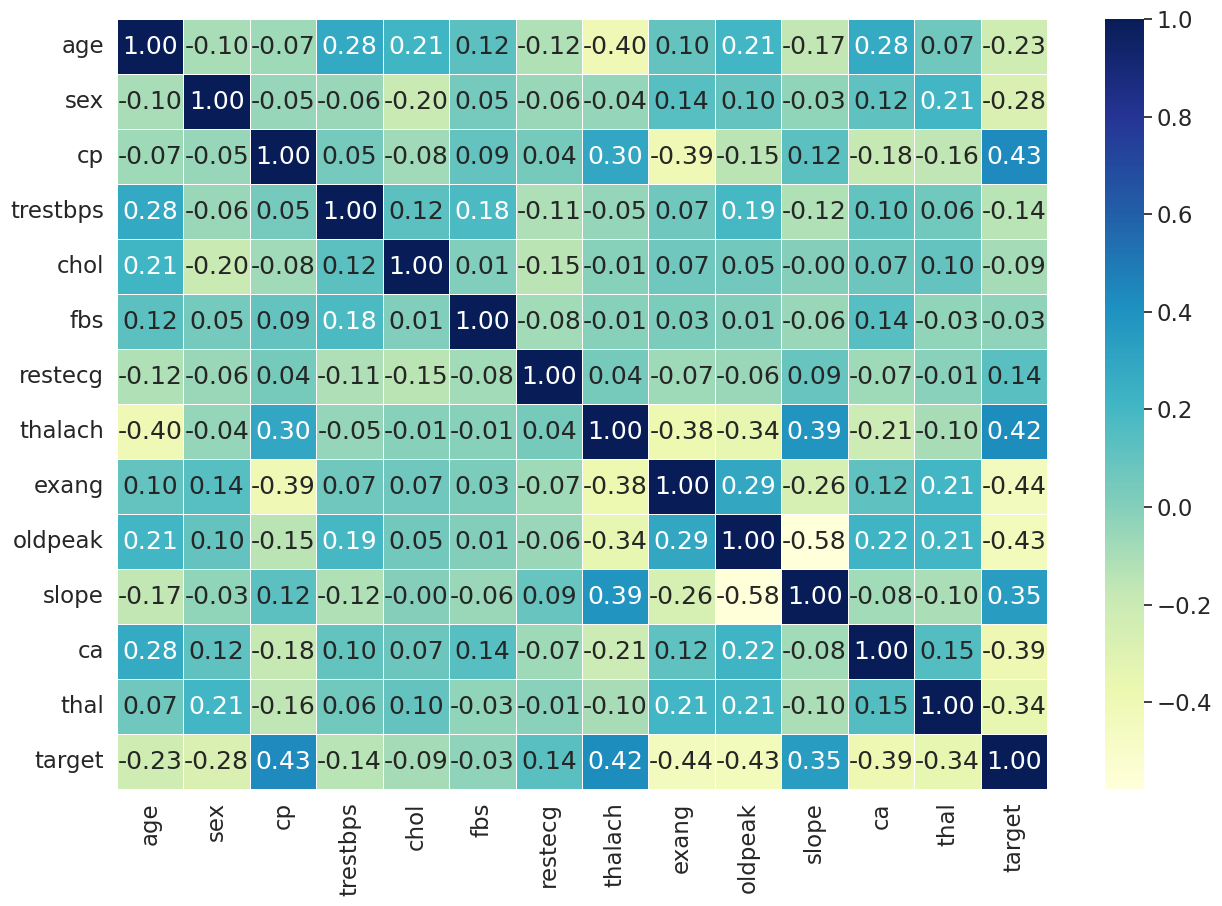

In [53]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

Nilai mendekati 1 menunjukkan korelasi positif yang kuat. Artinya,
jika satu variabel meningkat, variabel lainnya juga cenderung meningkat.

Nilai mendekati -1  menunjukkan korelasi negatif yang kuat. Artinya, jika satu variabel meningkat, variabel lainnya cenderung menurun.

Nilai mendekati 0 menunjukkan korelasi linear yang lemah atau tidak
ada. Ini berarti perubahan pada satu variabel tidak secara langsung beriringan dengan perubahan pada variabel lainnya.

 korelasi beberapa fitur penting dengan variabel target (memiliki penyakit jantung atau tidak):




*   cp (jenis nyeri dada): Memiliki korelasi positif yang cukup kuat
dengan target (0.43). Ini menunjukkan bahwa jenis nyeri dada tertentu (terutama tipe 2 seperti yang kita lihat di EDA sebelumnya) sangat berkaitan dengan keberadaan penyakit jantung.
*   thalach (detak jantung maksimal): Juga memiliki korelasi positif yang cukup kuat dengan target (0.42). Ini berarti orang dengan detak jantung maksimal yang lebih tinggi cenderung memiliki penyakit jantung.


*   exang (angina akibat olahraga): Menunjukkan korelasi negatif yang kuat dengan target (-0.44). Ini berarti jika seseorang mengalami angina akibat olahraga, kemungkinan besar mereka memiliki penyakit jantung (karena exang=1 berkorelasi negatif dengan target=0 dan positif dengan target=1).
*   oldpeak (ST depression): Memiliki korelasi negatif yang cukup kuat dengan target (-0.43). Sama seperti exang, nilai oldpeak yang lebih tinggi berkorelasi dengan tidak adanya penyakit jantung (target=0)

*   sex (jenis kelamin): Menunjukkan korelasi negatif yang moderat (-0.28). Ini berarti bahwa perempuan (sex=0) lebih cenderung memiliki penyakit jantung dibandingkan laki-laki (sex=1) dalam dataset ini, atau sebaliknya tergantung bagaimana encodingnya.

Korelasi positif berarti peningkatan fitur tersebut cenderung terkait dengan adanya penyakit jantung, sementara korelasi negatif berarti peningkatan fitur tersebut cenderung terkait dengan tidak adanya penyakit jantung.

## Modelling

In [18]:
# Split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

seluruh fitur digunakan sebagai variabel independen (X), sedangkan kolom target digunakan sebagai variabel dependen (y).

In [21]:
# Split data into train and test sets
np.random.seed(42)

#Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

Data dibagi menjadi 80% data latih dan 20% data uji. Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

disini saya akan menggunakan 3 algoritma yaitu:

- Logistic Regression. Logistic Regression digunakan sebagai model dasar (baseline) karena sederhana dan mudah diinterpretasikan.
- K-Nearest Neighbours Classifier. K-Nearest Neighbors (KNN) digunakan untuk melihat performa model berbasis jarak pada data yang telah dinormalisasi.
- Random Forest Classifier. digunakan untuk meningkatkan performa dengan menggabungkan banyak pohon keputusan serta mengurangi risiko overfitting.

In [24]:
#  models dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluare the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [25]:
model_scores = fit_and_score(models=models,
                                         x_train=x_train,
                                         x_test=x_test,
                                         y_train=y_train,
                                         y_test=y_test)
model_scores


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

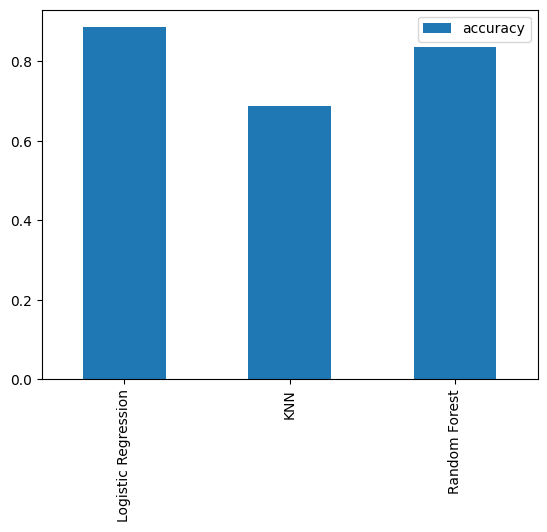

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Berikut hasil training dari ketiga algoritma tersebut:

Logistic Regression: Memperoleh akurasi sekitar 88.52%.

K-Nearest Neighbours (KNN): Memperoleh akurasi sekitar 68.85%.

Random Forest: Memperoleh akurasi sekitar 83.61%.

Dari hasil awal, Logistic Regression menunjukkan performa terbaik dibandingkan KNN dan Random Forest.

## Hyperparameter Tuning



*   Hyperparameter Tuning secara manual untuk algoritma KNN
*   Hyperparameter Tuning



## Hyperparameter tuning (manual) KNN

In [27]:
# tune KNN
train_scores = []
test_scores = []

#create a list different values for n_neighbors
neighbors = range(1, 21)

#set up KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algorithm
    knn.fit(x_train, y_train)

    #update the training scores list
    train_scores.append(knn.score(x_train, y_train))

    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


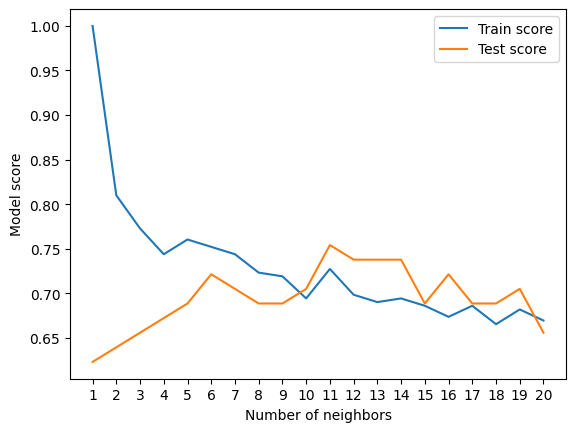

In [30]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")
#

## Hyperparameter tuning with RandomizedSearchCV

- LogisticRegression()
- RandomForestClassifier()



In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


#Create a hyperparameter grid for RandomForestClassifie
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [32]:
# Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [35]:
#Setup random seed
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

LogisticRegression memiliki skor terbaik, jadi kita akan lakukan Hyperparameter Tuning GridSearchCV

In [38]:
# DIfferent hyperparameters for our LogisticReegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#setup grid hyperparameter search for Logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
#check the best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [40]:
#evaluate the grid search logisticregression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

Kesimpulan performa model setelah tuning:

Logistic Regression masih menjadi model dengan akurasi tertinggi pada data uji, yaitu 88.52%.

Random Forest dengan 86.89%.

KNN menunjukkan peningkatan signifikan tetapi masih di bawah kedua model lainnya dengan 75.41%.

Ini menunjukkan bahwa Logistic Regression, bahkan dengan sedikit tuning atau bahkan dengan parameter default yang hampir optimal, sudah mampu memberikan hasil yang sangat baik untuk dataset ini.

## Evaluation our tuned machine learning classifier, beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [41]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


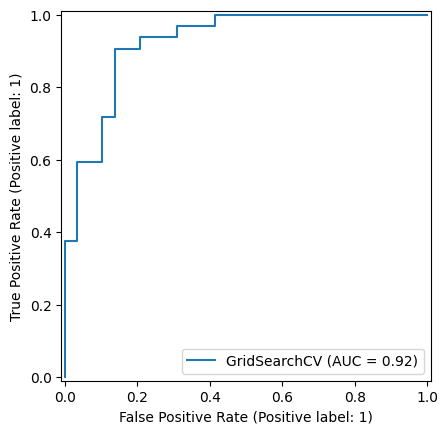

In [44]:
#plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

ROC Curve and AUC Score

ROC Curve menunjukkan kemampuan model dalam membedakan antara kelas positif (memiliki penyakit) dan negatif (tidak memiliki penyakit) pada berbagai ambang batas klasifikasi. Semakin melengkung kurva ke pojok kiri atas, semakin baik model tersebut.

AUC (Area Under the Curve) adalah metrik tunggal yang merangkum performa ROC curve. AUC yang didapat yaitu 0.92, yang dimana AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan diskriminasi yang sangat baik.

In [45]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


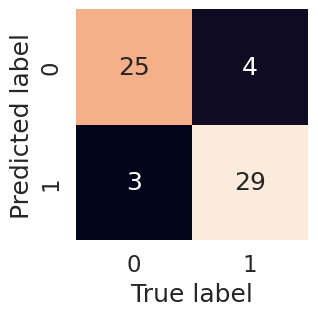

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

Confusion Matrix

True Negatives (TN): 25
Artinya, model dengan benar memprediksi 25 pasien tidak memiliki penyakit jantung (ketika mereka memang tidak memilikinya).

False Positives (FP): 4
Artinya, model salah memprediksi 4 pasien memiliki penyakit jantung (padahal mereka tidak memilikinya). Ini disebut Type I error.

False Negatives (FN): 3
Artinya, model salah memprediksi 3 pasien tidak memiliki penyakit jantung (padahal mereka memilikinya). Ini disebut Type II error dan seringkali lebih berbahaya dalam konteks medis karena pasien yang sakit bisa tidak tertangani.

True Positives (TP): 29
Artinya, model dengan benar memprediksi 29 pasien memiliki penyakit jantung (ketika mereka memang memilikinya).

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



| **Metric** | **Explanation** |
| ----- | ----- |
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |

### Cross Validation
Cross-validation dilakukan untuk mendapatkan estimasi performa model yang lebih robust dan untuk menilai seberapa baik model dapat menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya, tidak hanya pada satu split data uji.



In [54]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [55]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [58]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x, # Mengganti X menjadi x (huruf kecil)
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [61]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8215873015873015)

In [62]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.9272727272727274)

In [63]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.8705403543192143)

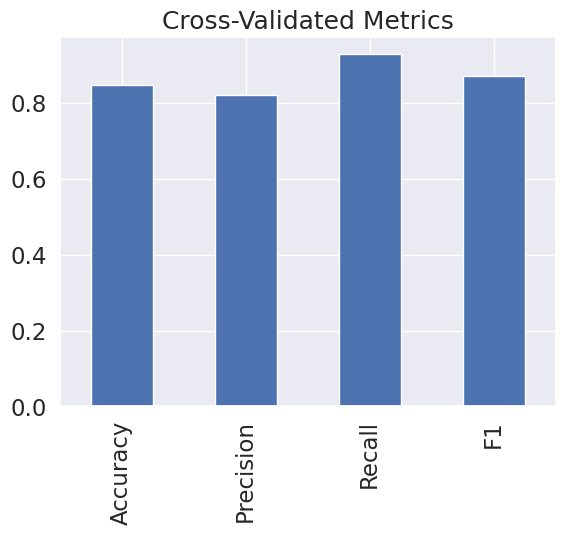

In [64]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);


Model Logistic Regression menunjukkan performa sangat baik dan konsisten dalam memprediksi penyakit jantung.



*   Akurasi rata-rata 84.80% menunjukkan keakuratan prediksi secara keseluruhan.
*   Presisi 82.16% menandakan model cukup baik dalam menghindari salah prediksi positif (mengatakan ada penyakit padahal tidak).






* Recall yang tinggi (92.73%) adalah insight terpenting: model sangat efektif dalam mendeteksi kasus penyakit jantung yang sebenarnya, meminimalkan risiko pasien sakit tidak terdiagnosis ( false negatives).

* F1-Score 87.05% mengkonfirmasi keseimbangan yang baik antara precision dan recall.

Secara keseluruhan, hasil cross-validation ini memberikan keyakinan bahwa model stabil dan dapat diandalkan untuk diterapkan pada data baru, terutama karena kemampuannya yang kuat dalam mengidentifikasi individu yang benar-benar berisiko penyakit jantung.

## Feature Importance
Feature Importance ini membantu kita memahami fitur mana saja yang paling berpengaruh dalam keputusan model untuk memprediksi penyakit jantung, berdasarkan koefisien dari model Logistic Regression.

In [66]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [67]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [68]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.003699220776580221),
 'sex': np.float64(-0.9042409028785717),
 'cp': np.float64(0.6747282587404362),
 'trestbps': np.float64(-0.011613401339975146),
 'chol': np.float64(-0.0017036439067759743),
 'fbs': np.float64(0.047876881148997324),
 'restecg': np.float64(0.3349019815885189),
 'thalach': np.float64(0.02472938284108309),
 'exang': np.float64(-0.6312040612837573),
 'oldpeak': np.float64(-0.5759095045469952),
 'slope': np.float64(0.4709514073081419),
 'ca': np.float64(-0.6516534770577476),
 'thal': np.float64(-0.6998420764664995)}

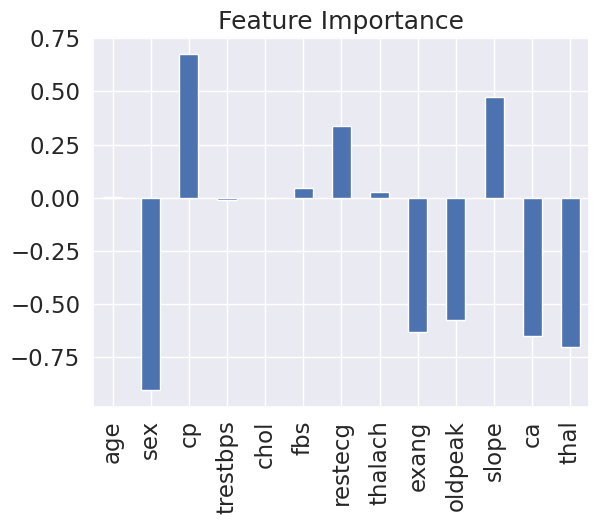

In [69]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

Koefisien ini menunjukkan seberapa besar perubahan pada variabel target (kemungkinan penyakit jantung) jika fitur tersebut berubah, sambil menjaga fitur lain konstan:


*   Koefisien positif yang besar: Semakin tinggi nilai fitur, semakin besar kemungkinan pasien memiliki penyakit jantung.
*   Koefisien negatif yang besar: Semakin tinggi nilai fitur, semakin kecil kemungkinan pasien memiliki penyakit jantung





In [70]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [71]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Beberapa fitur seperti cp (jenis nyeri dada) dan slope (kemiringan segmen ST) secara positif berkontribusi pada prediksi penyakit jantung, yang berarti nilai yang lebih tinggi pada fitur ini menunjukkan kemungkinan penyakit yang lebih besar. Sementara itu, fitur seperti sex, thal, ca, exang, dan oldpeak memiliki koefisien negatif, yang mengindikasikan bahwa nilai yang lebih tinggi pada fitur-fitur ini cenderung menurunkan kemungkinan penyakit jantung. Penting untuk diingat bahwa interpretasi koefisien ini harus selalu didukung oleh pemahaman domain yang kuat.

### Kesimpulan Project: Prediksi Penyakit Jantung Menggunakan Machine Learning

Project ini bertujuan untuk membangun model machine learning yang mampu mengklasifikasikan kondisi pasien ke dalam kategori memiliki penyakit jantung (1) atau tidak memiliki penyakit jantung (0) berdasarkan data klinis. Permasalahan ini diformulasikan sebagai tugas binary classification.

Data dan Eksplorasi: Dataset yang digunakan berasal dari UCI Machine Learning Repository, terdiri dari 13 fitur medis dan 1 variabel target. Setelah eksplorasi awal, ditemukan bahwa data bersih tanpa missing values. Analisis Korelasi menunjukkan hubungan signifikan antara fitur seperti cp (jenis nyeri dada), thalach (detak jantung maksimal), exang (angina akibat olahraga), oldpeak (ST depression), sex (jenis kelamin), ca (jumlah pembuluh darah utama) dan thal (hasil thalium stress test) dengan keberadaan penyakit jantung.

Pemodelan dan Evaluasi: Digunakan tiga algoritma machine learning: Logistic Regression, K-Nearest Neighbours (KNN), dan Random Forest. Setelah hyperparameter tuning, Logistic Regression terbukti menjadi model dengan performa terbaik. Evaluasi mendalam dengan cross-validation 5-fold menunjukkan hasil yang kuat:

Akurasi Rata-rata: 84.80%
Presisi Rata-rata: 82.16%
Recall Rata-rata: 92.73%
F1-Score Rata-rata: 87.05%
Insight Utama dari Evaluasi: Yang paling signifikan adalah tingginya nilai recall (92.73%). Ini menunjukkan bahwa model sangat efektif dalam mendeteksi kasus penyakit jantung yang sebenarnya, meminimalkan false negatives (pasien sakit yang tidak terdiagnosis). Dalam konteks medis, hal ini sangat krusial karena mengurangi risiko pasien yang memerlukan penanganan medis terlewatkan. Confusion matrix juga memperkuat hal ini, dengan jumlah false negatives yang rendah (3 kasus pada data uji).

Feature Importance: Analisis feature importance (berdasarkan koefisien Logistic Regression) mengidentifikasi cp, sex, thal, ca, exang, oldpeak, dan slope sebagai fitur-fitur paling berpengaruh dalam prediksi. Pemahaman terhadap arah dan kekuatan pengaruh masing-masing fitur ini memberikan wawasan klinis yang berharga.

Kesimpulan Akhir: Meskipun model mencapai akurasi yang tinggi (84.80%) pada hasil cross validation, nilai ini belum memenuhi target akurasi 93% yang ditetapkan sebagai tolok ukur untuk pengembangan lebih lanjut. Namun, model Logistic Regression yang dikembangkan menunjukkan kemampuan diskriminasi yang sangat baik, terutama dalam mengidentifikasi kasus penyakit jantung (tinggi recall), yang merupakan prioritas utama dalam aplikasi kesehatan. Untuk mencapai target akurasi 93%, langkah-langkah tambahan seperti rekayasa fitur yang lebih kompleks, pengumpulan data yang lebih besar, atau eksplorasi model yang lebih canggih (misalnya, gradient boosting) mungkin diperlukan.